<a href="https://colab.research.google.com/github/rakshajp/floor-plan-detection/blob/main/opencv_floorplan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pdf2image

SyntaxError: ignored

In [ ]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 0s (994 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 120899 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
from google.colab import drive
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
DATA_PATH = '/content/gdrive/My Drive/Floorplan/data/'
IMG_PATH = DATA_PATH + 'img_files/'
PDF_PATH = DATA_PATH + 'pdf_files/'

In [ ]:
IMG_NAME = "five_floor_plan_1.png"
PDF_NAME = 'A101_Oakland Self Storage.pdf'

In [ ]:
def display_image_from_path(img_path):
    img = cv2.imread(IMG_PATH + IMG_NAME)
    if img is None:
        print(f"Failed to load image at {img_path}")
        return
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

def display_image(img):
  if img is None:
      print(f"Failed to load image")
      return
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img_rgb)
  plt.axis('off')
  plt.show()

def convert_pdf_to_png(pdf_path):
  images = convert_from_path(pdf_path)
  img = images[0]
  img.save(IMG_PATH+'PNG_'+PDF_NAME[:-4], 'PNG')
  return img

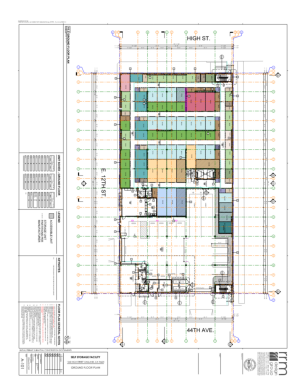

In [ ]:
display_image(IMG_PATH + IMG_NAME)

In [ ]:
PDF_NAME = 'Architectural/A-100-1ST-FLOOR-BUILDING-PLAN-Rev.3.pdf'
pdf_img = convert_pdf_to_png(PDF_PATH + PDF_NAME)

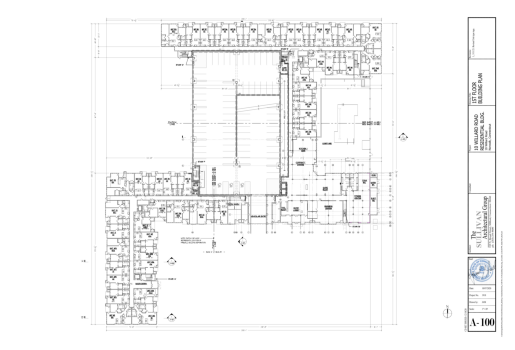

In [ ]:
IMG_NAME = 'PNG_'+PDF_NAME[:-4]
display_image_from_path(IMG_PATH + IMG_NAME)

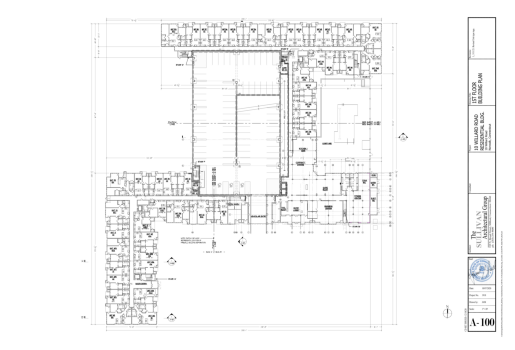

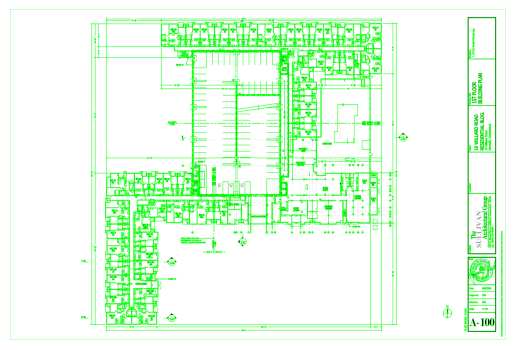

In [ ]:
# IMG_NAME = 'five_floor_plan_2.png'
img = cv2.imread(IMG_PATH + IMG_NAME)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(img_gray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img, contours, -1, (0, 255, 0), 3)
display_image(img)

In [ ]:
print('saved here: ',IMG_PATH+IMG_NAME+'_detected'+'.png')
cv2.imwrite(IMG_PATH+IMG_NAME+'detected'+'.png', img)

saved here:  /content/gdrive/My Drive/Floorplan/data/img_files/PNG_Architectural/A-100-1ST-FLOOR-BUILDING-PLAN-Rev.3_detected.png


True